<a href="https://colab.research.google.com/github/yongbin02/AI/blob/main/5%EC%A3%BC%EC%B0%A8/mnist_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# ----------------------
# 1. 데이터 세트 읽기
# ----------------------

digits = datasets.load_digits()

In [44]:
# --------------------
# 2. 이미지 평탄화
# --------------------

# 모델의 입력을 위해 1차원 배열로 변경
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [45]:
# --------------------------------------
# 3. 훈련 데이터 및 테스트 데이터 분리
# --------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

# 클래스가 총 10개 (0~9) -> 다중 분류 모델이므로 one-hot-encoding 방식 사용
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
num_classes = y_test_one_hot.shape[1]

In [46]:
# -------------------------------
# 4. 딥러닝 모델 생성
# -------------------------------

model = models.Sequential([
    # 1번 층: 64개의 뉴런을 가진 입력층. 활성화 함수는 'relu'
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    # 과적합 방지를 위해 30%의 뉴런을 랜덤하게 비활성화
    layers.Dropout(0.3),
    # 2번 층: 32개의 뉴런을 가진 은닉층.
    layers.Dense(32, activation="relu"),
    # 3번 층: 최종 결과 클래스 10개, 활성화 함수는 'softmax'
    layers.Dense(num_classes, activation="softmax")
])

# 학습 방법 설정
model.compile(optimizer='adam',                 # 옵티마이저
              loss='categorical_crossentropy',  # 다중 분류를 위한 손실 함수
              metrics=['accuracy'])             # 평가 지표

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# -----------------------------
# 5. 모델 학습 및 정확도 평가
# -----------------------------

# 조기종료 셋업
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("모델 학습을 시작합니다...")
history = model.fit(X_train, y_train_one_hot,
                    epochs=100,
                    batch_size=32,
                    verbose=0,
                    validation_data=(X_test, y_test_one_hot),
                    callbacks=[early_stopping])
print("학습 완료.")

# 테스트 데이터로 모델의 성능 평가
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"모델 정확도: {accuracy:.4f}")

모델 학습을 시작합니다...
학습 완료.
모델 정확도: 0.9722


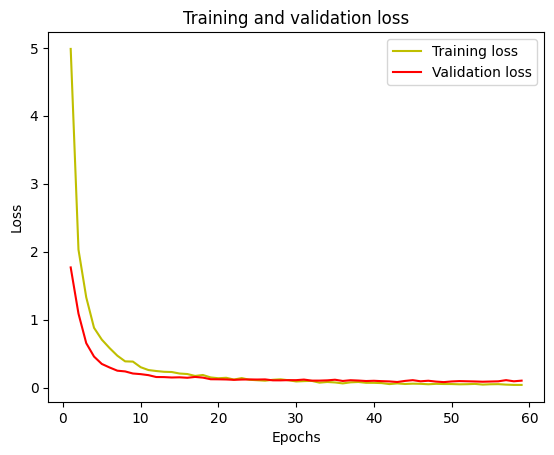

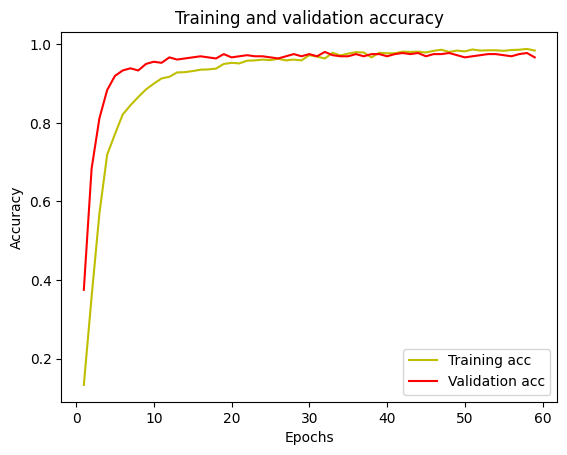

In [48]:
# ---------------------------
# 6. 학습과정 시각화
# ---------------------------

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

# 손실값 그래프
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

--- 분류 리포트 ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        43
           2       0.97      1.00      0.99        33
           3       0.98      0.95      0.96        43
           4       0.96      1.00      0.98        27
           5       0.89      0.94      0.92        35
           6       0.97      1.00      0.99        36
           7       1.00      1.00      1.00        29
           8       1.00      0.90      0.95        30
           9       0.98      0.96      0.97        48

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


--- 혼동 행렬 ---


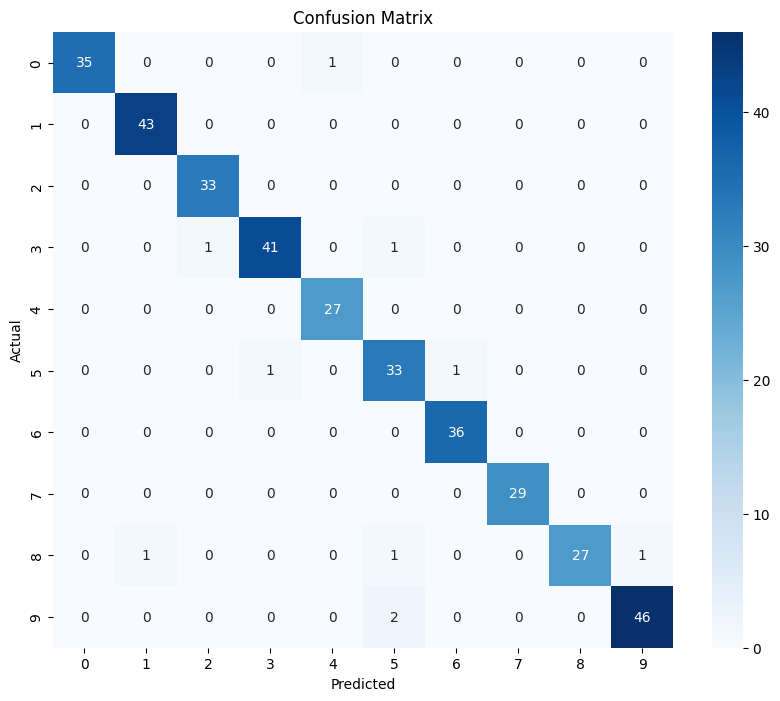

In [49]:
# ----------------------------------------------------
# 7. 모델 성능 상세 분석 (분류 리포트 및 혼동 행렬)
# --------------------------------------------------

# 테스트 데이터에 대한 예측을 수행
y_pred_probs = model.predict(X_test)
# 확률이 가장 높은 클래스의 인덱스를 가져와 최종 예측 클래스를 결정
y_pred_class = np.argmax(y_pred_probs, axis=1)

print("\n--- 분류 리포트 ---")
print(classification_report(y_test, y_pred_class))

print("\n--- 혼동 행렬 ---")
cm = confusion_matrix(y_test, y_pred_class)

# 혼동 행렬 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


--- 랜덤 샘플 5개 예측 결과 ---


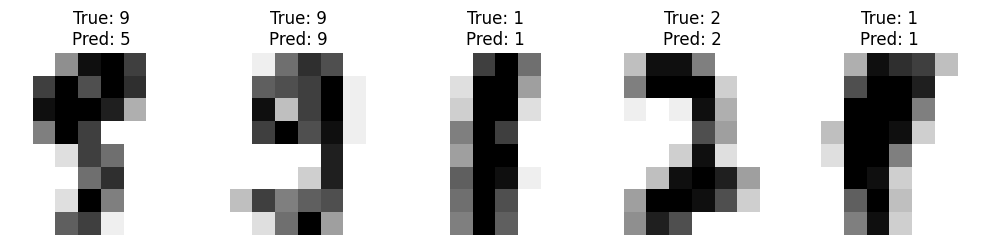

In [50]:
# --------------------------------------
# 8. 랜덤 샘플 예측 결과 시각화
# --------------------------------------

print("\n--- 랜덤 샘플 5개 예측 결과 ---")
# 테스트 데이터셋의 인덱스 중에서 5개를 무작위로 선택
random_indices = np.random.choice(len(X_test), 5, replace=False)

plt.figure(figsize=(10, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    # 1차원 배열(64)을 다시 8x8 이미지로 변환
    image = X_test[idx].reshape(8, 8)
    plt.imshow(image, cmap='gray_r', interpolation='nearest')
    # 실제 정답 및 예측 값
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_class[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()